このPython コードは、PyMC を使ってMCMCサンプリングを行います。
* 2025年8月時点では、Google Colaboratory環境では PyMC がそのまま使えますので、実行可能です。
* ローカルな計算機環境では、PyMC パッケージが含まれていないのが一般的です。
    * 例えば、Anaconda などの Distribution では、以下の例の様に、PyMC環境を用意する必要があります。
        ```
        conda create -c conda-forge -n pymc_env pymc
        conda activate pymc_env
        conda install conda-forge::ipywidgets
        conda install scikit-learn
        ```
        * これで VS codeの実行時のPython環境に、```pymc_env```を選択します。

In [1]:
############################################
BaseDir      = 'IntroDDSJpn/Chap02/'
OutputDir    = '2Prior-060103Gamma/'
FileBaseName = '2Prior-060103Gamma'

* Google Colabかどうかを判別し、このJupyter Notebookのあるディレクトリを特定します。

In [2]:
############################################
import sys
import os
############################################
def IsGoogleColab():
  if 'google.colab' in sys.modules:
    return True
  else:
    return False
############################################
if IsGoogleColab():
  #
  from google.colab import drive
  drive.mount('/content/drive')
  #
  IpynbDir = 'drive/My Drive/Colab Notebooks/' + BaseDir
else:
  #
  IpynbDir =  os.getcwd() + '/'
############################################
print( 'ipynb file path = %s' % IpynbDir )

ipynb file path = d:\home\iakai\CY\Docs\Kuma3Curriculum\2025森北出版\GitHubIntroDDSJpn\IntroDDSJpn\Chap02/


* 必要なパッケージを読み込み、ファイルの出力先のディレクトリを用意します。

In [3]:
############################################
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
print('matplotlib Ver.', mpl.__version__)
#
############################################
import numpy as np
print('numpy      Ver.', np.__version__)
#
############################################
# https://docs.pymc.io/
import pymc as pm
import time
print('pymc       Ver.', pm.__version__)
#
############################################
FilePath = IpynbDir + OutputDir
print( 'FilePath = %s' % FilePath )
#
if( True != os.path.isdir(FilePath) ):
    print('  making %s' % FilePath )
    os.mkdir(FilePath)
else:
    print(' %s is exist.' % FilePath )

matplotlib Ver. 3.10.0
numpy      Ver. 1.26.4


WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


pymc       Ver. 5.16.1
FilePath = d:\home\iakai\CY\Docs\Kuma3Curriculum\2025森北出版\GitHubIntroDDSJpn\IntroDDSJpn\Chap02/2Prior-060103Gamma/
  making d:\home\iakai\CY\Docs\Kuma3Curriculum\2025森北出版\GitHubIntroDDSJpn\IntroDDSJpn\Chap02/2Prior-060103Gamma/


---
ガンマ分布
$$
{\rm PGamma}(x;\alpha,\beta)=
\frac{\beta^\alpha{}x^{\alpha-1}}{\Gamma(\alpha)}\exp(-\beta{}x),
\;\;\;
x\in[0,\infty]
$$


In [4]:
############################################
from math import gamma as gamma_func
############################################
# ##3. ガンマ分布
def PGamma(x, alpha, beta):
    res = beta**alpha * x**(alpha-1) * np.exp(-beta*x)/ gamma_func(alpha)
    res[(x<0)] = 0
    return res

In [5]:
############################################
xx = np.linspace(0,20, num=201)

In [6]:
############################################
a1 = 1.0
b1  = 0.5
PGamma1 = PGamma(xx, a1, b1)
a2 = 2.0
b2  = 0.5
PGamma2 = PGamma(xx, a2, b2)
a3 = 3.0
b3  = 1.0
PGamma3 = PGamma(xx, a3, b3)
a4 = 7.5
b4  = 1.0
PGamma4 = PGamma(xx, a4, b4)
############################################
with pm.Model() as  model:
    G1 = pm.Gamma('G1',alpha=a1,beta=b1)
    G2 = pm.Gamma('G2',alpha=a2,beta=b2)
    G3 = pm.Gamma('G3',alpha=a3,beta=b3)
    G4 = pm.Gamma('G4',alpha=a4,beta=b4)
    Gamma1 = pm.draw( G1, draws=100000)
    Gamma2 = pm.draw( G2, draws=100000)
    Gamma3 = pm.draw( G3, draws=100000)
    Gamma4 = pm.draw( G4, draws=100000)

In [7]:
############################################
def GrfHist(Dist, alpha, beta, func_xx, func_Gamma):
    Gamma_mean = np.mean( Dist )
    Gamma_std  = np.std( Dist )
    ylabel = 'Gamma(alpha=%.2f,beta=%.1f)' % (alpha, beta)
    hlabel = r'$\hat{\mu}=%.3f$, $\hat{\sigma}=%.3f$' % (Gamma_mean, Gamma_std)
    ########################################
    plt.rcParams['font.size'] = 16
    #
    fig = plt.figure( figsize=(6,6) )
    fig.subplots_adjust(left=0.18,
                        right=0.97,
                        top=0.94,
                        bottom=0.1)
    #
    ax1 = fig.add_subplot(1,1,1)
    ax1.set_xlabel(r'$x$')
    ax1.set_xlim( 0, 20 )
    ax1.set_ylabel( ylabel )
    #
    bin_values, bins, patches = ax1.hist(
        Dist,
        bins=100, density=True,
        label=hlabel)
    #
    bin_values_max = np.amax( bin_values )
    #
    (y_bot, y_top) = ax1.set_ylim((0,bin_values_max * 1.2))
    #
    ax1.plot( func_xx, func_Gamma, label=r'$\mathcal{G}(\alpha=%.1f,\beta=%.1f)$' % (alpha, beta) )
    #
    plt.title( ylabel )
    #
    plt.legend()
    #
    plt.grid(True)
    #
    plt.show()
    #
    return fig

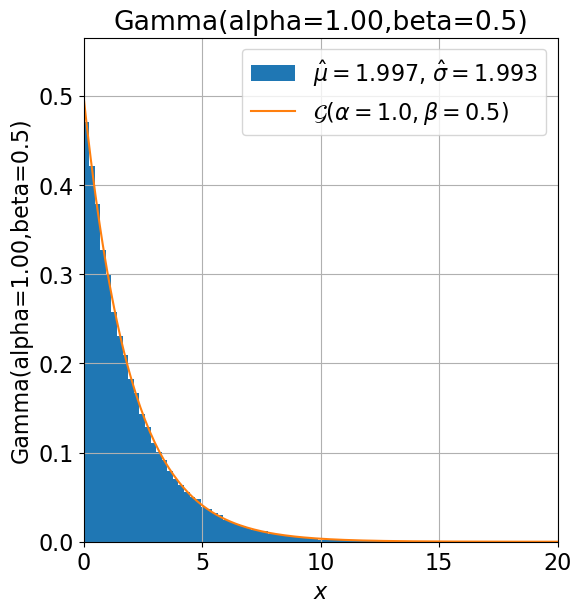

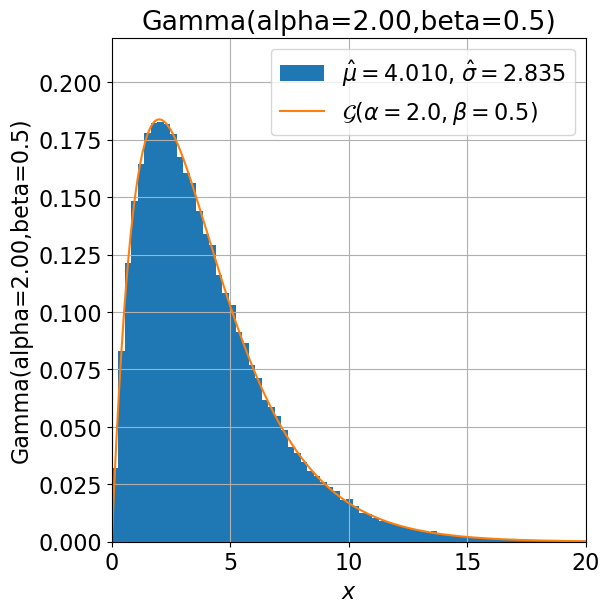

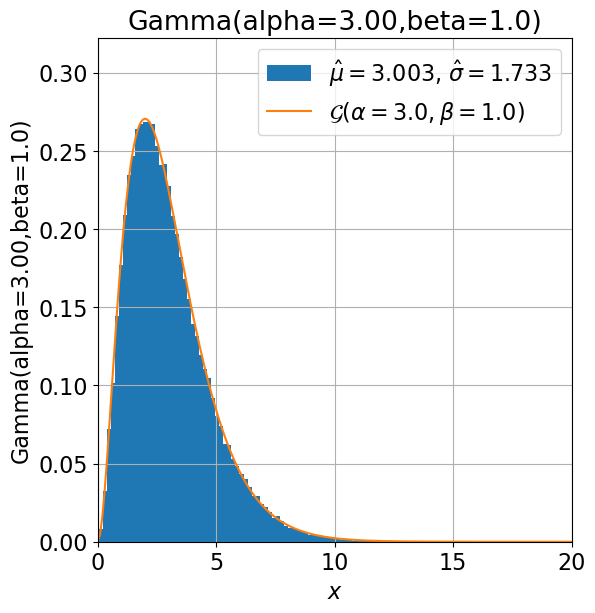

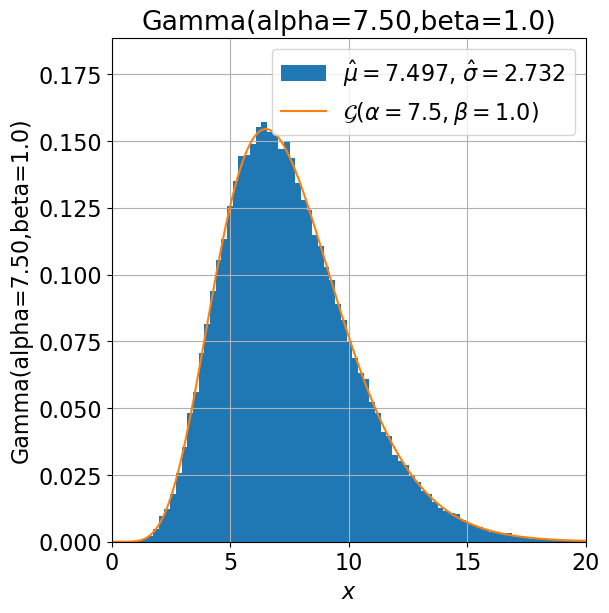

In [8]:
######################################
fig = GrfHist(Gamma1, a1, b1, xx, PGamma1)
######################################
pdfName = FilePath + FileBaseName + '-01.pdf'
fig.savefig( pdfName )
#
######################################
fig = GrfHist(Gamma2, a2, b2, xx, PGamma2)
######################################
pdfName = FilePath + FileBaseName + '-02.pdf'
fig.savefig( pdfName )
#
######################################
fig = GrfHist(Gamma3, a3, b3, xx, PGamma3)
######################################
pdfName = FilePath + FileBaseName + '-03.pdf'
fig.savefig( pdfName )
#
######################################
fig = GrfHist(Gamma4, a4, b4, xx, PGamma4)
######################################
pdfName = FilePath + FileBaseName + '-04.pdf'
fig.savefig( pdfName )
#